In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import math


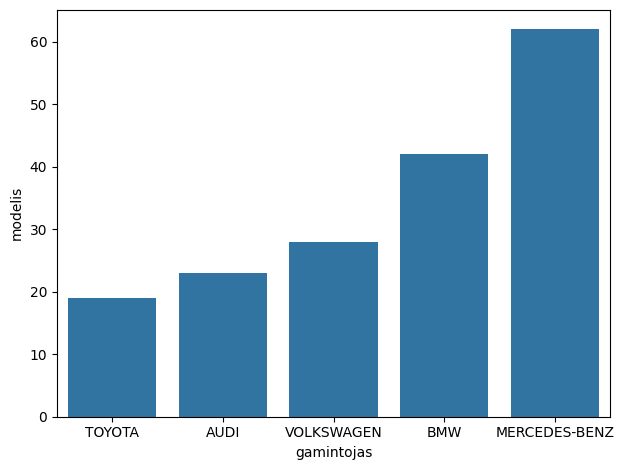

In [2]:
#nuskaitykite auto.csv, ir pridėkite prie šios lentelės tokių stulpelių : 
# gamintojo trys pirmos raidės didžiosiomis, suskaičiuokite, kiek kiekvienas gamintojas turėjo skirtingų automobilių modelių, 
# ADVANCED - pavaizduokite tai grafiškai. Grafiko pobūdį ir kaip tai padarysite - renkatės patys. Hint - .groupby().reset_index() gali duoti lentelę

auto = pd.read_csv('NewData/auto.csv', sep='|')[['gamintojas','modelis']]


auto['gamintojas'] = auto['gamintojas'].str.upper()

auto_modeliai= auto.groupby('gamintojas')['modelis'].nunique().sort_values().reset_index() # paima unikale verte ''nunique''
auto_model = auto_modeliai.tail()

fig, axis = plt.subplots()
#plotting code:

axis = sns.barplot(data= auto_model, x='gamintojas', y='modelis')

fig.tight_layout()
plt.show()


In [14]:
df = pd.DataFrame() # Tuscio data frame sukurimas
df['a'] = np.random.randint(10,50,10) # musu tektas csv faile
df.to_csv('demoDF.csv', sep=';') # 

In [31]:
#Surinkite visus kauno dienos straipsnių pavadinimus į pandas dataframe. +
Kaunas = pd.read_csv('KaunoDiena.csv', sep=",")

#pridėkite naują stulpelį, kuriame būtų žodžių kiekis kiekviename pavadinime

# def splt(tekstas):
#         return ([zodis for zodis in tekstas.split(',')])

# Kaunas['Zodziu_kiekis'] = Kaunas['Pavadinimai'].apply(splt).count()\

def splt(txt):
    return len(txt.split())

Kaunas['Simboliu_kiekis'] = Kaunas['Pavadinimai'].apply(len)

Kaunas.head()

#pridėkite naują stulpelį, kuriame būtų pavadinime esančių simbolių kiekis
Kaunas['zodziu_kiekis'] = Kaunas['Pavadinimai'].apply(splt)
Kaunas.head()
#eksportuokite tai į CSV failą
#eksportuotą CSV failą nuskaitykite su pandas
#Koks vidutinis žodžių kiekis pavadinimuose?



#Advanced: suraskite dažniausiai pasikartojantį žodį pavadinimuose
#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)

,Unnamed: 0,Pavadinimai,Simboliu_kiekis,zodziu_kiekis
0,0,Landynė daugiabutyje: ar gali būti blogiau?,43,6
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...,85,8
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...,73,10
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...,55,8
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade,46,5


In [ ]:
#Koks vidutinis žodžių kiekis pavadinimuose?
Zodziu_vidurkis = Kaunas['zodziu_kiekis'].mean(numeric_only=True)
print(f'zodziu vidurkis {Zodziu_vidurkis}')

<Axes: xlabel='zodziu_kiekis', ylabel='Pavadinimai'>

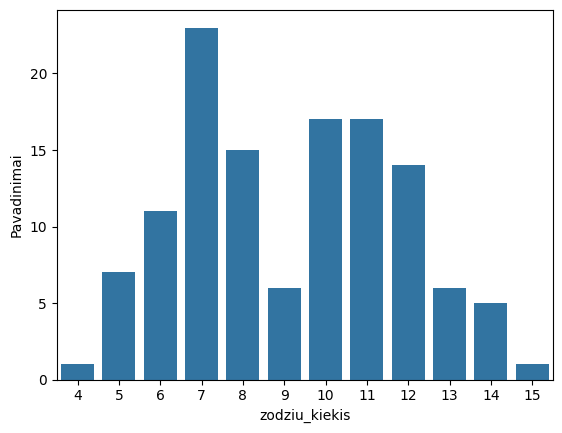

In [27]:
#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)

kn = Kaunas.groupby('zodziu_kiekis').count().reset_index()[['zodziu_kiekis','Pavadinimai']]
sns.barplot(data=kn, x='zodziu_kiekis', y='Pavadinimai')

In [36]:
#Advanced: suraskite dažniausiai pasikartojantį žodį pavadinimuose
# auto_modeliai= auto.groupby('gamintojas')['modelis'].nunique().sort_values().reset_index() # paima unikale verte ''nunique''

VisuZodziuSarasas = []
for e in Kaunas['Pavadinimai'].str.split():
    VisuZodziuSarasas.extend(e)
print(VisuZodziuSarasas)
VisiZodziai = pd.DataFrame() # naujos data frame sukurimas
VisiZodziai['zodziai'] = VisuZodziuSarasas
VisiZodziai['zodziai'].value_counts().sort_values(ascending=False).reset_index()

['Landynė', 'daugiabutyje:', 'ar', 'gali', 'būti', 'blogiau?', 'Smarkios', 'avarijos', 'Ramučiuose', 'liudininkai:', 'kalti', 'neveikiantys', 'šviesoforai!', '(papildyta)', 'Už', 'šūkį', '„šlovė', 'Ukrainai“', '–', 'išpuoliai', 'prieš', 'lietuvius', 'užsienio', 'kurortuose', 'Kauno', 'centre', '–', 'girto', 'vairuotojo', 'šou:', 'nukentėjo', 'keleivis', '„Vičiūnų', 'grupė“', 'pardavė', 'gamyklą', 'Kaliningrade', 'Orai:', 'kai', 'kur', 'Lietuvoje', 'iš', 'dangaus', 'krito', 'snaigės', 'Mugė', 'Laisvės', 'alėjoje', '–', 'dar', 'gausesnė', 'Lietingą', 'rytą', 'Kaune', 'lydėjo', 'avarijos', 'Žada,', 'kad', 'iki', '2050-ųjų', 'žuvusiųjų', 'avarijose', 'nebebus:', 'kliedesiai', 'ar', 'realybė?', '„Vičiūnų', 'grupė“', 'pardavė', 'gamyklą', 'Kaliningrade', 'Landynė', 'daugiabutyje:', 'ar', 'gali', 'būti', 'blogiau?', 'Mugė', 'Laisvės', 'alėjoje', '–', 'dar', 'gausesnė', 'JAV', 'žiniasklaida:', 'Izraelis', 'smogė', 'Iranui', 'Sužydėjusios', 'Kauno', 'puošmenos', 'džiugins', 'iki', 'pat', 'ruden

,zodziai,count
0,–,33
1,ir,17
2,į,11
3,„Kauno,7
4,su,7
...,...,...
791,Jaloveckas,1
792,įtartini,1
793,"radiniai,",1
794,vairuotojas,1


In [ ]:
# Hint: https://stackoverflow.com/questions/69216352/how-to-extract-text-from-specific-spans-using-beautifulsoup
#kas atliko šią užduotį: turit likus į kiekvieną straipsnį konkrečiai. 
# Surinkite tokią statistiką - kiek žodžių turi straipsniai? Koks vidutinis žodžių kiekis? 
# Kiek yra straipsnių, kurių žodžių kiekis yra mažesnis, didesnis už vidurkį? Kokia žodžių kiekio mediana?